In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [7]:
df = pd.read_csv("ICRISAT-District Level Data - ICRISAT-District Level Data (1).csv")
df.head()

,Dist Code,Year,State Code,State Name,Dist Name,RICE AREA (1000 ha),RICE PRODUCTION (1000 tons),RICE YIELD (Kg per ha),WHEAT AREA (1000 ha),WHEAT PRODUCTION (1000 tons),...,SUGARCANE YIELD (Kg per ha),COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),FRUITS AREA (1000 ha),VEGETABLES AREA (1000 ha),FRUITS AND VEGETABLES AREA (1000 ha),POTATOES AREA (1000 ha),ONION AREA (1000 ha),FODDER AREA (1000 ha)
0,1,1966,14,Chhattisgarh,Durg,548.0,185.0,337.59,44.0,20.0,...,1777.78,0.0,0.0,0.0,5.95,6.64,12.59,0.01,0.60,0.47
1,1,1967,14,Chhattisgarh,Durg,547.0,409.0,747.71,50.0,26.0,...,1500.00,0.0,0.0,0.0,5.77,7.24,13.02,0.01,0.56,1.23
2,1,1968,14,Chhattisgarh,Durg,556.3,468.0,841.27,53.7,30.0,...,1000.00,0.0,0.0,0.0,5.41,7.40,12.81,0.10,0.58,1.02
3,1,1969,14,Chhattisgarh,Durg,563.4,400.8,711.40,49.4,26.5,...,1900.00,0.0,0.0,0.0,5.52,7.16,12.69,0.01,0.56,0.84
4,1,1970,14,Chhattisgarh,Durg,571.6,473.6,828.55,44.2,29.0,...,2000.00,0.0,0.0,0.0,5.45,7.19,12.64,0.02,0.52,0.42


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16146 entries, 0 to 16145
Data columns (total 80 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Dist Code                                    16146 non-null  int64  
 1   Year                                         16146 non-null  int64  
 2   State Code                                   16146 non-null  int64  
 3   State Name                                   16146 non-null  object 
 4   Dist Name                                    16146 non-null  object 
 5   RICE AREA (1000 ha)                          16146 non-null  float64
 6   RICE PRODUCTION (1000 tons)                  16146 non-null  float64
 7   RICE YIELD (Kg per ha)                       16146 non-null  float64
 8   WHEAT AREA (1000 ha)                         16146 non-null  float64
 9   WHEAT PRODUCTION (1000 tons)                 16146 non-null  float64
 10

In [9]:
df.shape

(16146, 80)

In [10]:
df.isnull().sum()

Dist Code                               0
Year                                    0
State Code                              0
State Name                              0
Dist Name                               0
                                       ..
VEGETABLES AREA (1000 ha)               0
FRUITS AND VEGETABLES AREA (1000 ha)    0
POTATOES AREA (1000 ha)                 0
ONION AREA (1000 ha)                    0
FODDER AREA (1000 ha)                   0
Length: 80, dtype: int64

In [11]:
pd.set_option("display.max_rows", None)

In [12]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

In [13]:
df.isnull().sum()

dist_code                                      0
year                                           0
state_code                                     0
state_name                                     0
dist_name                                      0
rice_area_(1000_ha)                            0
rice_production_(1000_tons)                    0
rice_yield_(kg_per_ha)                         0
wheat_area_(1000_ha)                           0
wheat_production_(1000_tons)                   0
wheat_yield_(kg_per_ha)                        0
kharif_sorghum_area_(1000_ha)                  0
kharif_sorghum_production_(1000_tons)          0
kharif_sorghum_yield_(kg_per_ha)               0
rabi_sorghum_area_(1000_ha)                    0
rabi_sorghum_production_(1000_tons)            0
rabi_sorghum_yield_(kg_per_ha)                 0
sorghum_area_(1000_ha)                         0
sorghum_production_(1000_tons)                 0
sorghum_yield_(kg_per_ha)                      0
pearl_millet_area_(1

In [14]:
# connect with SQL:
import mysql.connector as mysqlcon
connection = mysqlcon.connect(host = 'localhost', user = 'root', password = 'Rani')
cursor = connection.cursor()

In [ ]:
cursor.execute('CREATE DATABASE agridata')
cursor.execute('use agridata')

In [15]:
df.columns = (
    df.columns
    .str.strip()  # remove leading/trailing spaces
    .str.lower()  # make lowercase
    .str.replace(r"\(.*\)", "", regex=True)  # remove text inside ()
    .str.replace(" ", "_")  # replace spaces with underscores
    .str.replace("__", "_")  # collapse double underscores
)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16146 entries, 0 to 16145
Data columns (total 80 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   dist_code                         16146 non-null  int64  
 1   year                              16146 non-null  int64  
 2   state_code                        16146 non-null  int64  
 3   state_name                        16146 non-null  object 
 4   dist_name                         16146 non-null  object 
 5   rice_area_                        16146 non-null  float64
 6   rice_production_                  16146 non-null  float64
 7   rice_yield_                       16146 non-null  float64
 8   wheat_area_                       16146 non-null  float64
 9   wheat_production_                 16146 non-null  float64
 10  wheat_yield_                      16146 non-null  float64
 11  kharif_sorghum_area_              16146 non-null  float64
 12  khar

In [18]:
df.columns = df.columns.str.rstrip('_')  # remove trailing underscore
print(df.columns.tolist())


['dist_code', 'year', 'state_code', 'state_name', 'dist_name', 'rice_area', 'rice_production', 'rice_yield', 'wheat_area', 'wheat_production', 'wheat_yield', 'kharif_sorghum_area', 'kharif_sorghum_production', 'kharif_sorghum_yield', 'rabi_sorghum_area', 'rabi_sorghum_production', 'rabi_sorghum_yield', 'sorghum_area', 'sorghum_production', 'sorghum_yield', 'pearl_millet_area', 'pearl_millet_production', 'pearl_millet_yield', 'maize_area', 'maize_production', 'maize_yield', 'finger_millet_area', 'finger_millet_production', 'finger_millet_yield', 'barley_area', 'barley_production', 'barley_yield', 'chickpea_area', 'chickpea_production', 'chickpea_yield', 'pigeonpea_area', 'pigeonpea_production', 'pigeonpea_yield', 'minor_pulses_area', 'minor_pulses_production', 'minor_pulses_yield', 'groundnut_area', 'groundnut_production', 'groundnut_yield', 'sesamum_area', 'sesamum_production', 'sesamum_yield', 'rapeseed_and_mustard_area', 'rapeseed_and_mustard_production', 'rapeseed_and_mustard_yield'

In [20]:
df.drop([
 'sorghum_area',               
 'sorghum_production',       
 'sorghum_yield',
 'barley_area',               
 'barley_production',          
 'barley_yield',               
 'chickpea_area',             
 'chickpea_production',        
 'chickpea_yield',            
 'pigeonpea_area',           
 'pigeonpea_production',  
 'pigeonpea_yield',
 'minor_pulses_area',    
 'minor_pulses_production',
 'minor_pulses_yield',
 'rapeseed_and_mustard_yield',
 'fruits_area',       
 'vegetables_area',
 'fruits_and_vegetables_area',
 'potatoes_area',          
 'onion_area',                
 'fodder_area',
 'sesamum_area',                   
 'sesamum_production',            
 'sesamum_yield',                
 'rapeseed_and_mustard_area',    
 'rapeseed_and_mustard_production',
 'rapeseed_and_mustard_yield', 
 'safflower_area',
 'safflower_production',    
 'safflower_yield',             
 'castor_area',              
 'castor_production',       
 'castor_yield',        
 'linseed_area',    
 'linseed_production',
 'linseed_yield'], axis = 1, inplace = True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16146 entries, 0 to 16145
Data columns (total 44 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   dist_code                  16146 non-null  int64  
 1   year                       16146 non-null  int64  
 2   state_code                 16146 non-null  int64  
 3   state_name                 16146 non-null  object 
 4   dist_name                  16146 non-null  object 
 5   rice_area                  16146 non-null  float64
 6   rice_production            16146 non-null  float64
 7   rice_yield                 16146 non-null  float64
 8   wheat_area                 16146 non-null  float64
 9   wheat_production           16146 non-null  float64
 10  wheat_yield                16146 non-null  float64
 11  kharif_sorghum_area        16146 non-null  float64
 12  kharif_sorghum_production  16146 non-null  float64
 13  kharif_sorghum_yield       16146 non-null  flo

In [22]:
df.head()

,dist_code,year,state_code,state_name,dist_name,rice_area,rice_production,rice_yield,wheat_area,wheat_production,...,soyabean_yield,oilseeds_area,oilseeds_production,oilseeds_yield,sugarcane_area,sugarcane_production,sugarcane_yield,cotton_area,cotton_production,cotton_yield
0,1,1966,14,Chhattisgarh,Durg,548.0,185.0,337.59,44.0,20.0,...,0.0,50.70,-1.0,-1.00,0.9,1.6,1777.78,0.0,0.0,0.0
1,1,1967,14,Chhattisgarh,Durg,547.0,409.0,747.71,50.0,26.0,...,0.0,113.55,-1.0,-1.00,0.8,1.2,1500.00,0.0,0.0,0.0
2,1,1968,14,Chhattisgarh,Durg,556.3,468.0,841.27,53.7,30.0,...,0.0,126.62,-1.0,-1.00,1.0,1.0,1000.00,0.0,0.0,0.0
3,1,1969,14,Chhattisgarh,Durg,563.4,400.8,711.40,49.4,26.5,...,0.0,114.14,14.9,130.54,1.0,1.9,1900.00,0.0,0.0,0.0
4,1,1970,14,Chhattisgarh,Durg,571.6,473.6,828.55,44.2,29.0,...,0.0,126.40,24.3,192.25,0.7,1.4,2000.00,0.0,0.0,0.0


In [23]:
cursor.execute ("""
CREATE TABLE crop_data (
    dist_code INT,
    dist_name VARCHAR(100),
    state_code INT,
    state_name VARCHAR(100),
    year INT,
    rice_area FLOAT,
    rice_production FLOAT,
    rice_yield FLOAT,
    wheat_area FLOAT,
    wheat_production FLOAT,
    wheat_yield FLOAT,
    oilseeds_area FLOAT,
    oilseeds_production FLOAT,
    oilseeds_yield FLOAT,
    sugarcane_area FLOAT,
    sugarcane_production FLOAT,
    sugarcane_yield FLOAT,
    cotton_area FLOAT,
    cotton_production FLOAT,
    cotton_yield FLOAT,
    maize_area FLOAT,
    maize_production FLOAT,
    maize_yield FLOAT,
    groundnut_area FLOAT,
    groundnut_production FLOAT,
    groundnut_yield FLOAT,
    sunflower_area FLOAT,
    sunflower_production FLOAT,
    sunflower_yield FLOAT,
    kharif_sorghum_area FLOAT,
    kharif_sorghum_production FLOAT,
    kharif_sorghum_yield FLOAT,
    rabi_sorghum_area FLOAT,
    rabi_sorghum_production FLOAT,
    rabi_sorghum_yield FLOAT,
    soyabean_area FLOAT,
    soyabean_production FLOAT,
    soyabean_yield FLOAT,
    finger_millet_area float,
    finger_millet_production float,
    finger_millet_yield float,
    pearl_millet_area float,
    pearl_millet_production float,
    pearl_millet_yield float,
    PRIMARY KEY (dist_code, year)
    
)
""")
connection.commit()
print("Table created successfully!")


Table created successfully!


In [25]:
# Get all column names from DataFrame
columns = df.columns.tolist()

# Create placeholders for each column value
placeholders = ', '.join(['%s'] * len(columns))
insert_column_names = ', '.join(columns)

# Inserting query
insert_query = f"INSERT INTO crop_data ({insert_column_names}) VALUES ({placeholders})"

# Convert dataframe rows to list of tuples
data = [tuple(row) for row in df.to_numpy()]


In [26]:
cursor.executemany(insert_query, data)
connection.commit()
print("All data inserted successfully!")

All data inserted successfully!


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16146 entries, 0 to 16145
Data columns (total 44 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   dist_code                  16146 non-null  int64  
 1   year                       16146 non-null  int64  
 2   state_code                 16146 non-null  int64  
 3   state_name                 16146 non-null  object 
 4   dist_name                  16146 non-null  object 
 5   rice_area                  16146 non-null  float64
 6   rice_production            16146 non-null  float64
 7   rice_yield                 16146 non-null  float64
 8   wheat_area                 16146 non-null  float64
 9   wheat_production           16146 non-null  float64
 10  wheat_yield                16146 non-null  float64
 11  kharif_sorghum_area        16146 non-null  float64
 12  kharif_sorghum_production  16146 non-null  float64
 13  kharif_sorghum_yield       16146 non-null  flo

In [25]:
# Save cleaned DataFrame to CSV
df.to_csv("crop_data_cleaned.csv", index=False)


In [26]:
prod_data = pd.read_csv("crop_data_cleaned.csv")
pd.set_option("display.max_colwidth", None)

In [27]:
prod_data.head()

,dist_code,year,state_code,state_name,dist_name,rice_area,rice_production,rice_yield,wheat_area,wheat_production,...,soyabean_yield,oilseeds_area,oilseeds_production,oilseeds_yield,sugarcane_area,sugarcane_production,sugarcane_yield,cotton_area,cotton_production,cotton_yield
0,1,1966,14,Chhattisgarh,Durg,548.0,185.0,337.59,44.0,20.0,...,0.0,50.70,-1.0,-1.00,0.9,1.6,1777.78,0.0,0.0,0.0
1,1,1967,14,Chhattisgarh,Durg,547.0,409.0,747.71,50.0,26.0,...,0.0,113.55,-1.0,-1.00,0.8,1.2,1500.00,0.0,0.0,0.0
2,1,1968,14,Chhattisgarh,Durg,556.3,468.0,841.27,53.7,30.0,...,0.0,126.62,-1.0,-1.00,1.0,1.0,1000.00,0.0,0.0,0.0
3,1,1969,14,Chhattisgarh,Durg,563.4,400.8,711.40,49.4,26.5,...,0.0,114.14,14.9,130.54,1.0,1.9,1900.00,0.0,0.0,0.0
4,1,1970,14,Chhattisgarh,Durg,571.6,473.6,828.55,44.2,29.0,...,0.0,126.40,24.3,192.25,0.7,1.4,2000.00,0.0,0.0,0.0


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

C:\Users\S\AppData\Local\Temp\ipykernel_5248\189762353.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "state_name", y = "rice_production", data = top7, palette='viridis')


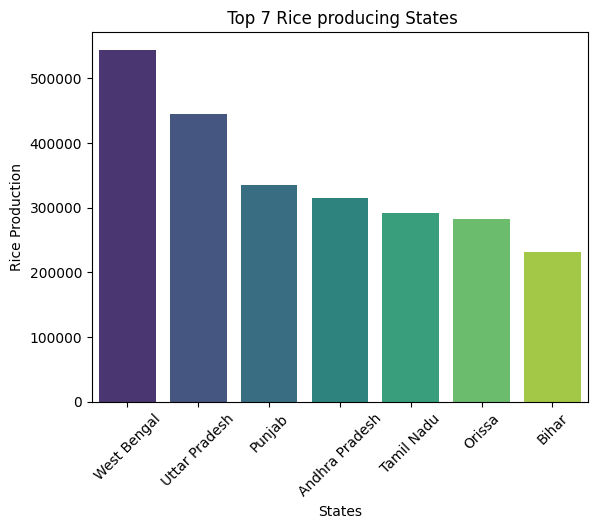

In [29]:
# Top 7 RICE PRODUCTION State Data(Bar_plot)
state_rice = prod_data.groupby("state_name")['rice_production'].sum().reset_index()
top7 = state_rice.sort_values(by = "rice_production", ascending = False).head(7)

sns.barplot(x = "state_name", y = "rice_production", data = top7, palette='viridis')
plt.rcParams['figure.figsize']=[8,6]
plt.title(" Top 7 Rice producing States")
plt.xlabel("States")
plt.ylabel("Rice Production")
plt.xticks(rotation = 45)
plt.show()

C:\Users\S\AppData\Local\Temp\ipykernel_5248\2632167219.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="state_name", y="wheat_production", data=top5, palette='magma')


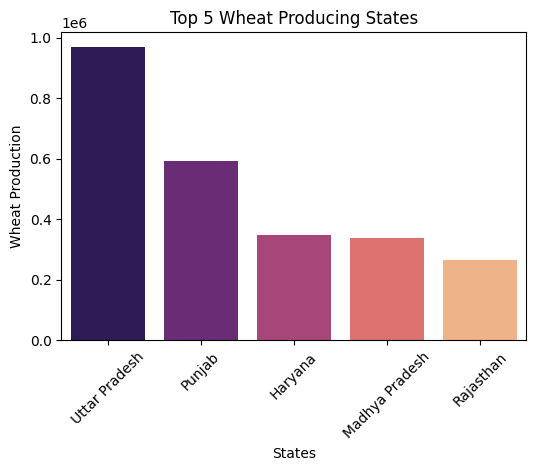

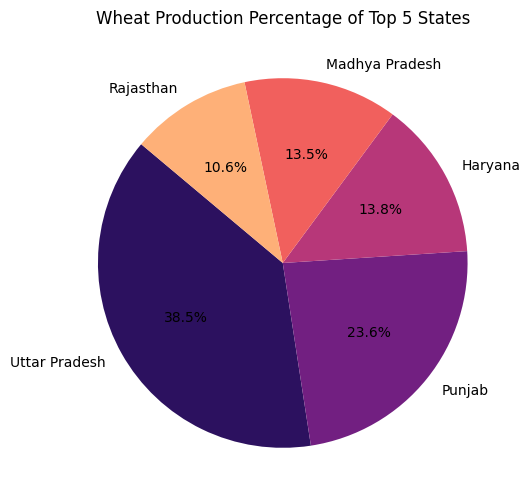

In [30]:
# Top 5 Wheat Producing States Data(Bar_chart)and its percentage(%)(Pie_chart)
state_wheat = prod_data.groupby("state_name")['wheat_production'].sum().reset_index()
top5 = state_wheat.sort_values(by = "wheat_production", ascending = False).head(5)

# ---- Bar Plot ----
plt.figure(figsize=(6,4))
sns.barplot(x="state_name", y="wheat_production", data=top5, palette='magma')
plt.title("Top 5 Wheat Producing States")
plt.xlabel("States")
plt.ylabel("Wheat Production")
plt.xticks(rotation=45)
plt.show()

# ---- Pie Chart ----
plt.figure(figsize=(8,6))
plt.pie(top5['wheat_production'], labels=top5['state_name'], 
        autopct='%1.1f%%', startangle=140, colors=sns.color_palette('magma', 5))
explode = (0.05, 0.05, 0.05, 0.05, 0.05,)
plt.title("Wheat Production Percentage of Top 5 States")
plt.show()

C:\Users\S\AppData\Local\Temp\ipykernel_5248\2382940550.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x ='state_name', y = "oilseeds_production", data = top5_oilseeds, palette = "viridis")


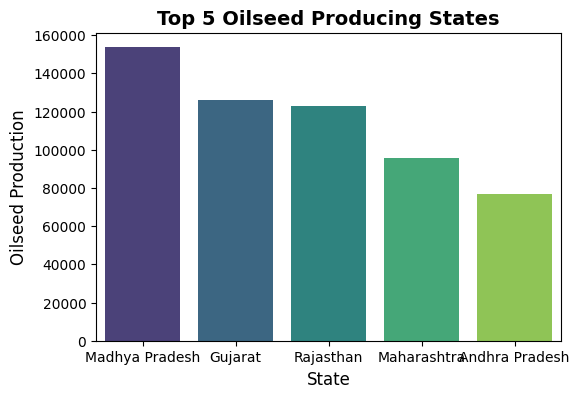

In [31]:
# Oil seed production by top 5 states
state_oilseeds = prod_data.groupby("state_name")['oilseeds_production'].sum().reset_index()
top5_oilseeds = state_oilseeds.sort_values(by = "oilseeds_production", ascending= False).head(5)

plt.figure(figsize=(6,4))
sns.barplot(x ='state_name', y = "oilseeds_production", data = top5_oilseeds, palette = "viridis")
plt.title('Top 5 Oilseed Producing States', fontsize=14, fontweight='bold')
plt.xlabel('State', fontsize=12)
plt.ylabel('Oilseed Production', fontsize=12)
plt.show()


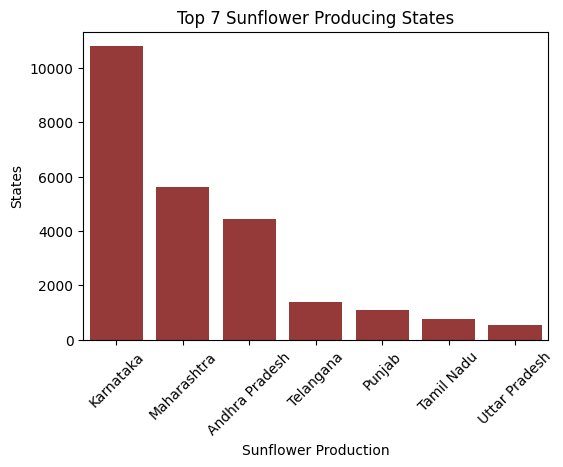

In [33]:
# Top 7 SUNFLOWER PRODUCTION State
state_sunflower = prod_data.groupby("state_name")["sunflower_production"].sum().reset_index()
top_state = state_sunflower.sort_values(by = "sunflower_production", ascending= False).head(7)

plt.figure(figsize=(6,4))
sns.barplot(x = "state_name", y = "sunflower_production", data = top_state, color = "brown")
plt.title("Top 7 Sunflower Producing States")
plt.xlabel("Sunflower Production")
plt.ylabel("States")
plt.xticks(rotation=45)
plt.show()


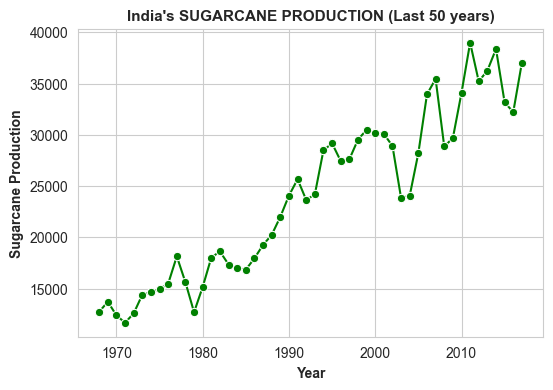

In [42]:
# India's SUGARCANE PRODUCTION From Last 50 Years(Line_plot)
sugarcan_prod = prod_data.groupby("year")["sugarcane_production"].sum().reset_index().sort_values("year").tail(50)

plt.figure(figsize=(6,4))
sns.lineplot(x = "year", y = "sugarcane_production", data = sugarcan_prod, marker = "o", color = "green")
sns.set_style("whitegrid")
plt.title("India's SUGARCANE PRODUCTION (Last 50 years)", fontsize = 11, fontweight="bold")
plt.xlabel("Year", fontweight="bold")
plt.ylabel("Sugarcane Production", fontweight="bold")
plt.show()

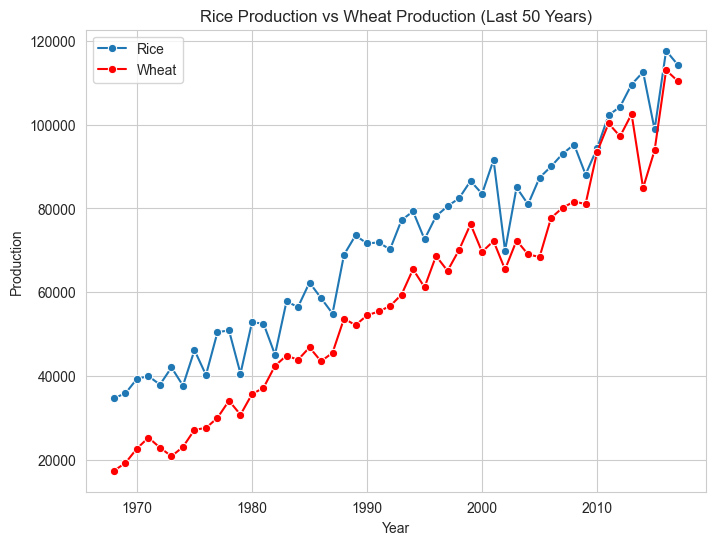

In [68]:
# Rice Production Vs Wheat Production (Last 50y)
production = prod_data.groupby("year")[["rice_production","wheat_production"]].sum().reset_index().sort_values("year").tail(50)

sns.set_style("whitegrid")
sns.lineplot(x="year", y="rice_production", data = production, label="Rice", marker="o")
sns.lineplot(x="year", y="wheat_production", data = production, label="Wheat", marker="o", color = "red")
plt.title("Rice Production vs Wheat Production (Last 50 Years)")
plt.xlabel("Year")
plt.ylabel("Production")
plt.show()

C:\Users\S\AppData\Local\Temp\ipykernel_6848\2119781669.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dist, x="rice_production", y="dist_name", palette="viridis")


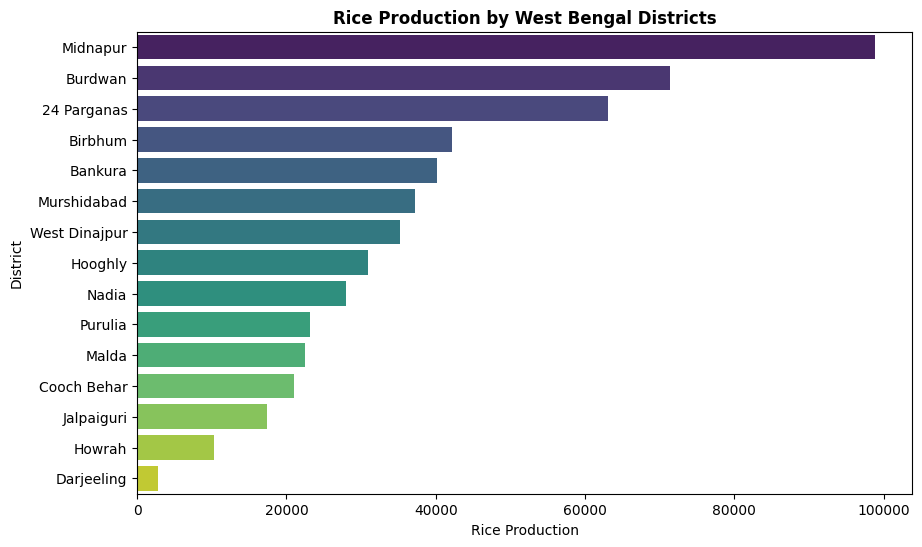

In [31]:
# Rice Production By West Bengal Districts
dist = prod_data[prod_data["state_name"]=="West Bengal"].groupby("dist_name")["rice_production"].sum().reset_index().sort_values("rice_production", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=dist, x="rice_production", y="dist_name", palette="viridis")
plt.title("Rice Production by West Bengal Districts", fontweight="bold")
plt.xlabel("Rice Production")
plt.ylabel("District")
plt.show()

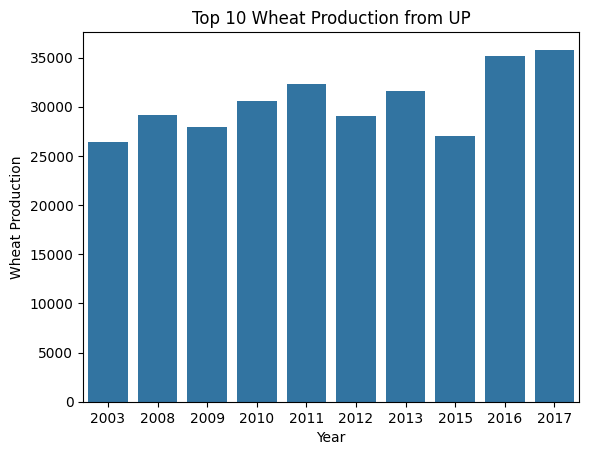

In [ ]:
prod = prod_data[prod_data["state_name"]=="Uttar Pradesh"].groupby("year")["wheat_production"].sum().reset_index().sort_values("wheat_production", ascending=False).head(10)
sns.barplot(x = "year", y = "wheat_production", data = prod)
plt.title("Top 10 Wheat Production from UP")
plt.xlabel("Year")
plt.ylabel("Wheat Production")
plt.show()

In [52]:
print(prod_data.columns.tolist())

['dist_code', 'year', 'state_code', 'state_name', 'dist_name', 'rice_area', 'rice_production', 'rice_yield', 'wheat_area', 'wheat_production', 'wheat_yield', 'kharif_sorghum_area', 'kharif_sorghum_production', 'kharif_sorghum_yield', 'rabi_sorghum_area', 'rabi_sorghum_production', 'rabi_sorghum_yield', 'pearl_millet_area', 'pearl_millet_production', 'pearl_millet_yield', 'maize_area', 'maize_production', 'maize_yield', 'finger_millet_area', 'finger_millet_production', 'finger_millet_yield', 'groundnut_area', 'groundnut_production', 'groundnut_yield', 'sunflower_area', 'sunflower_production', 'sunflower_yield', 'soyabean_area', 'soyabean_production', 'soyabean_yield', 'oilseeds_area', 'oilseeds_production', 'oilseeds_yield', 'sugarcane_area', 'sugarcane_production', 'sugarcane_yield', 'cotton_area', 'cotton_production', 'cotton_yield']


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51],
 [Text(0, 0, '1966'),
  Text(1, 0, '1967'),
  Text(2, 0, '1968'),
  Text(3, 0, '1969'),
  Text(4, 0, '1970'),
  Text(5, 0, '1971'),
  Text(6, 0, '1972'),
  Text(7, 0, '1973'),
  Text(8, 0, '1974'),
  Text(9, 0, '1975'),
  Text(10, 0, '1976'),
  Text(11, 0, '1977'),
  Text(12, 0, '1978'),
  Text(13, 0, '1979'),
  Text(14, 0, '1980'),
  Text(15, 0, '1981'),
  Text(16, 0, '1982'),
  Text(17, 0, '1983'),
  Text(18, 0, '1984'),
  Text(19, 0, '1985'),
  Text(20, 0, '1986'),
  Text(21, 0, '1987'),
  Text(22, 0, '1988'),
  Text(23, 0, '1989'),
  Text(24, 0, '1990'),
  Text(25, 0, '1991'),
  Text(26, 0, '1992'),
  Text(27, 0, '1993'),
  Text(28, 0, '1994'),
  Text(29, 0, '1995'),
  Text(30, 0, '19

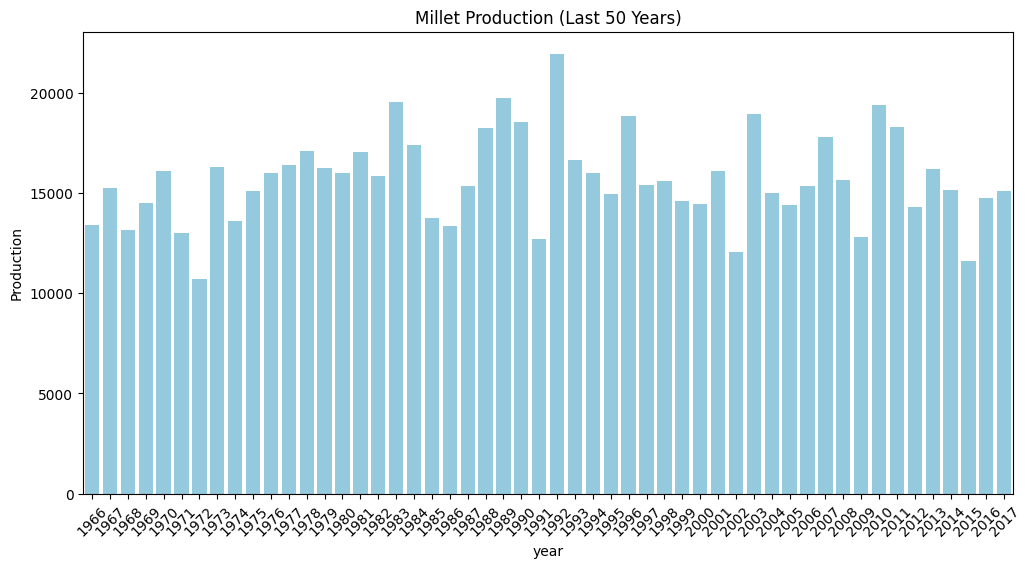

In [61]:
# Millet Production (Last 50y)
millet = prod_data[prod_data["year"]>= prod_data["year"].max() - 51]
millet50 = millet[["year", "kharif_sorghum_production", "rabi_sorghum_production", "pearl_millet_production"]].groupby("year").sum().reset_index()
millet50['total_millet'] = millet50[['kharif_sorghum_production', 'rabi_sorghum_production', 'pearl_millet_production']].sum(axis=1)

plt.figure(figsize=(12,6))
sns.barplot(x='year', y = "total_millet", data=millet50, color='skyblue')
plt.title("Millet Production (Last 50 Years)")
plt.ylabel("Production")
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Andhra Pradesh'),
  Text(1, 0, 'Assam'),
  Text(2, 0, 'Bihar'),
  Text(3, 0, 'Chhattisgarh'),
  Text(4, 0, 'Gujarat'),
  Text(5, 0, 'Haryana'),
  Text(6, 0, 'Himachal Pradesh'),
  Text(7, 0, 'Jharkhand'),
  Text(8, 0, 'Karnataka'),
  Text(9, 0, 'Kerala'),
  Text(10, 0, 'Madhya Pradesh'),
  Text(11, 0, 'Maharashtra'),
  Text(12, 0, 'Orissa'),
  Text(13, 0, 'Punjab'),
  Text(14, 0, 'Rajasthan'),
  Text(15, 0, 'Tamil Nadu'),
  Text(16, 0, 'Telangana'),
  Text(17, 0, 'Uttar Pradesh'),
  Text(18, 0, 'Uttarakhand'),
  Text(19, 0, 'West Bengal')])

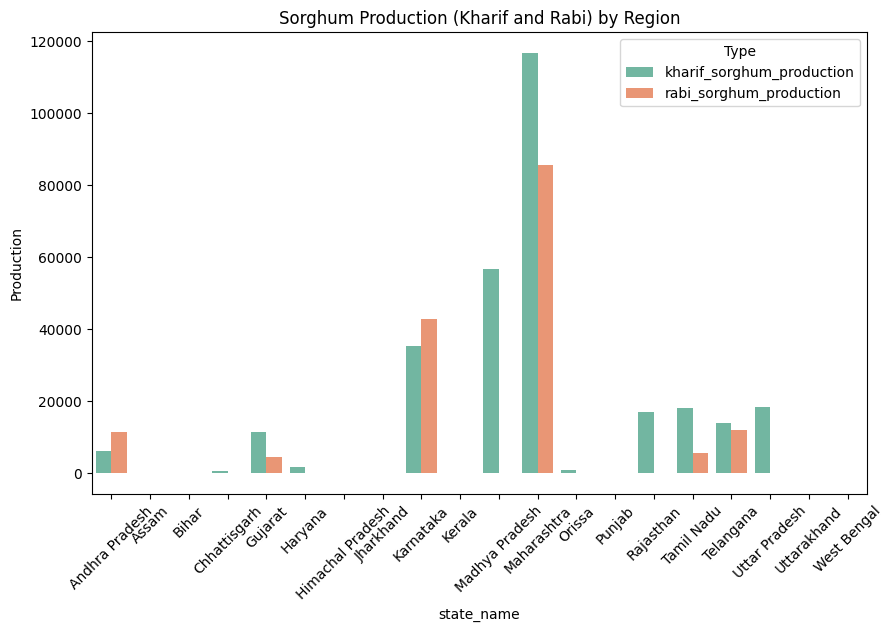

In [71]:
# Sorghum Production (Kharif and Rabi) by Region
sorghum = prod_data.groupby("state_name")[["kharif_sorghum_production", "rabi_sorghum_production"]].sum().reset_index()
sorghum = sorghum.melt(id_vars='state_name', var_name='Type', value_name='Production')
plt.figure(figsize=(10,6))
sns.barplot(x = "state_name", y = "Production", data = sorghum, hue = "Type", palette='Set2')
plt.title("Sorghum Production (Kharif and Rabi) by Region")
plt.xticks(rotation=45)

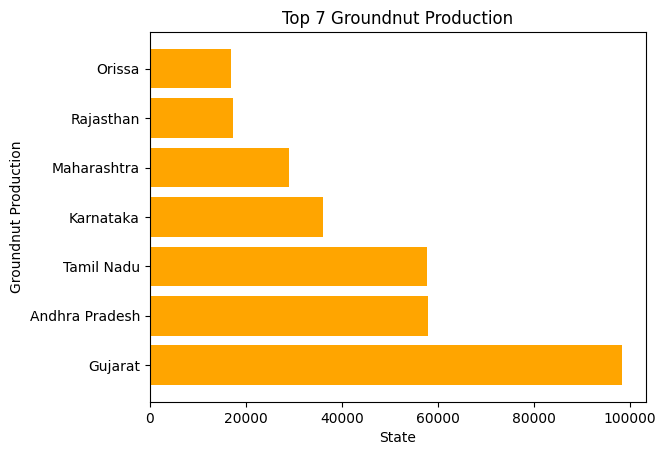

In [76]:
# Top 7 States for Groundnut Production
groundnut = prod_data.groupby("state_name")["groundnut_production"].sum().reset_index().sort_values("groundnut_production", ascending=False).head(7)
plt.barh(groundnut['state_name'], groundnut['groundnut_production'], color = 'orange')
plt.title("Top 7 Groundnut Production")
plt.xlabel("State")
plt.ylabel("Groundnut Production")
plt.show()

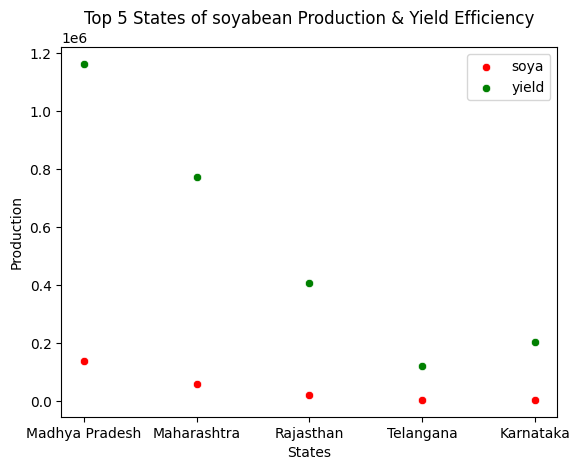

In [82]:
# Soybean Production by Top 5 States and Yield Efficiency
soyabean = prod_data.groupby("state_name")[["soyabean_production", "soyabean_yield"]].sum().reset_index().sort_values("soyabean_production", ascending=False).head(5)

sns.scatterplot(x = "state_name", y = "soyabean_production", data = soyabean, label = "soya", marker = "o", color = "red")
sns.scatterplot(x = "state_name", y = "soyabean_yield", data = soyabean, label = "yield", marker = "o", color = "green")
plt.title("Top 5 States of soyabean Production & Yield Efficiency")
plt.xlabel("States")
plt.ylabel("Production")
#plt.xticks(rotation=45)
plt.legend()


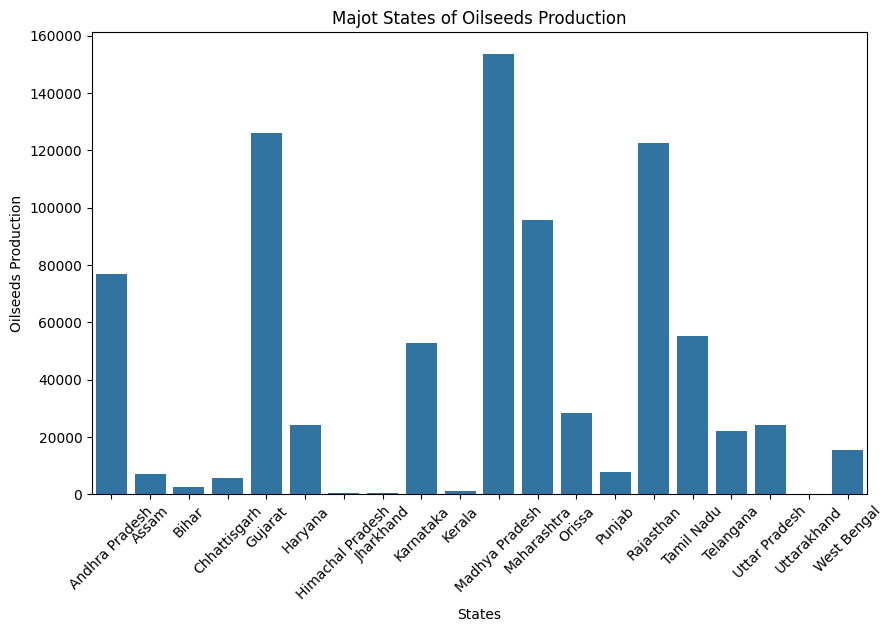

In [89]:
# Oilseed Production in Major States
oilseed = prod_data.groupby("state_name")["oilseeds_production"].sum().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x = "state_name", y = "oilseeds_production", data = oilseed)
plt.title("Majot States of Oilseeds Production")
plt.xlabel("States")
plt.ylabel("Oilseeds Production")
plt.xticks(rotation=45)
plt.show()

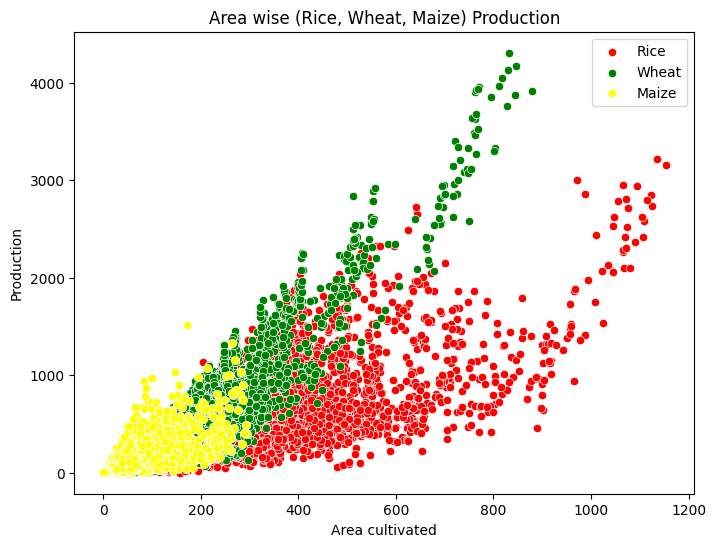

In [93]:
# Impact of Area Cultivated on Production (Rice, Wheat, Maize)
plt.figure(figsize=(8,6))
sns.scatterplot(x = "rice_area", y = "rice_production", data = prod_data, label = "Rice", color = "red")
sns.scatterplot(x = "wheat_area", y = "wheat_production", data = prod_data, label = "Wheat", color = "green")
sns.scatterplot(x = "maize_area", y = "maize_production", data = prod_data, label = "Maize", color = "yellow")
plt.title("Area wise (Rice, Wheat, Maize) Production")
plt.xlabel("Area cultivated")
plt.ylabel("Production")
plt.legend()

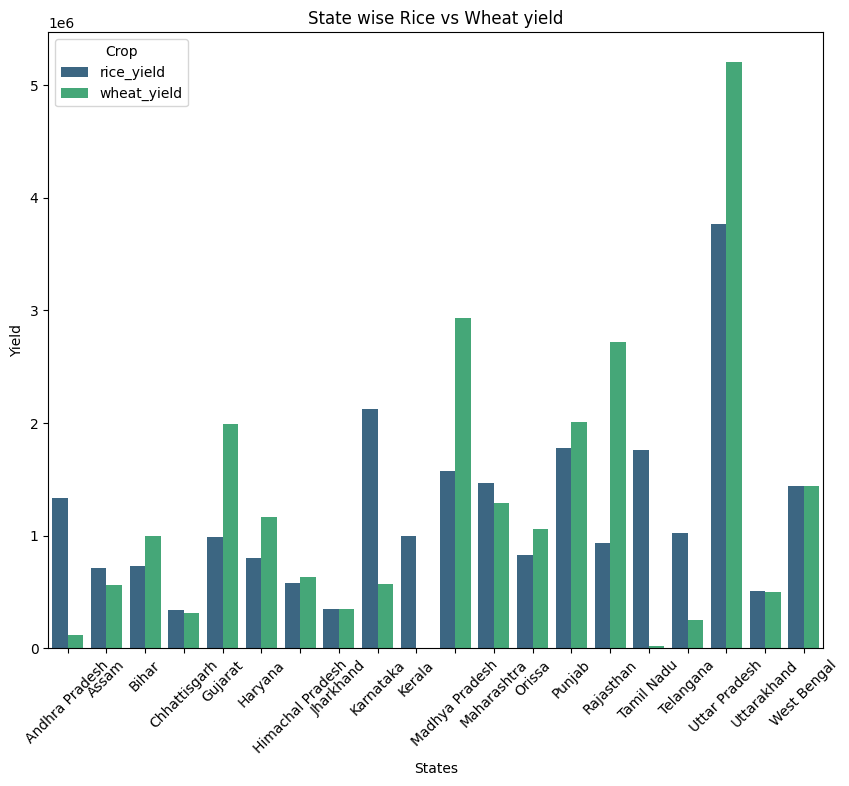

In [113]:
# Rice vs Wheat Yield Across States
plt.figure(figsize=(10,8))
data1 = prod_data.groupby("state_name")[["rice_yield", "wheat_yield"]].sum().reset_index()
data1 = data1.melt(id_vars="state_name", var_name="Crop", value_name="Yield")
sns.barplot(x = "state_name", y = "Yield", hue = "Crop", data = data1, palette="viridis")
plt.title("State wise Rice vs Wheat yield")
plt.xlabel("States")
plt.ylabel("Yield")
plt.xticks(rotation=45)
plt.show()
